<a href="https://colab.research.google.com/github/jevgenik/manuals/blob/main/testing_vision_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, import some libraries that you'll need:

*   `tensorfolow` does the actual machine learning and image recognition work
*   `os` accesses the operating system, to work with the stored image file
*   `maplotlib.pyplot` displays the image in the Colab notebook
*   `numpy` is used to help convert the image into numbers for the model to read



In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

The `get_image_from_url` function below takes a URL, fetches the image at it, and stores it in a file.
It then returns the path to the file. This lets you take an image from the internet and turn it into a local file you can give to your model.

It will fail if the image at the URL cannot be read by a machine. Wikipedia images are a good way to avoid this, as is uploading images to your Google Drive.

In [ ]:
def get_image_from_url(image_url):
  # If the temporary test_image.jpg file already exists,
  # delete it so a new one can be made.
  if os.path.exists('/root/.keras/datasets/test_image.jpg'):
    os.remove('/root/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url) # get_file() downloads a file from a URL and returns the path to the downloaded file
  return image_path # image_path is a string containing the path to the downloaded image file

The `print_classifications` function takes a list of predictions, looks up the labels for them,
then prints the labels and the weight the model has given to that label. It will save you some work later.

In [ ]:
def print_classifications(classifications):
    for (classification, number) in zip(classifications[0], range(1, len(classifications[0])+1)): # zip() combines elements from multiple iterables (e.g., lists) into tuples, creating an iterator of tuples
      print('{}. {} {:.2f}%'.format(number, classification[1], classification[2]*100))

Load the model that will identify your images:

In [ ]:
model = tf.keras.applications.VGG16() # keras is a high-level API for building and training deep learning models in TensorFlow.
                                      # VGG16() is a function within the applications module that loads the VGG-16 model.
                                      # applications is a module within keras that contains pre-trained models
                                      # model (vgg16_weights_tf_dim_ordering_tf_kernels.h5) .h5 is a file format that can store weights
                                      # and biases of a neural network. It is a binary file format.

553467096/553467096 [==============================] - 7s 0us/step


Create a function to make predictions about what an image shows:

In [ ]:
def classify_image(image_url):
  # Fetch the image from the URL
  image_path = get_image_from_url(image_url)
  # Prepare the image for use by the model
  # image is a PIL image object (PIL is a Python Imaging Library)
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

  plt.figure() # creates a new figure. A figure can have multiple plots.
  plt.imshow(image) # displays the image

  image = tf.keras.preprocessing.image.img_to_array(image) # converts the image to a NumPy array
  image = np.expand_dims(image, axis=0) # adds a dimension to the array at index 0 (axis=0). This is because the model expects a batch of images as input, so we need to add a batch dimension to the image.
  #print(image)

  classification_result = model.predict(image, batch_size=1) # classification_result is a NumPy array containng the model's predictions, array has shape (1, 1000) since VGG16 
                                                             # was trained on ImageNet, which has 1000 classes. Each element in the array represents the model's confidence score
                                                             # for a specific ImageNet class.
                                                             # [[4.58991109e-11 4.67163565e-11 3.91732291e-09 1.99315897e-09
                                                             #   3.50627216e-09 1.99878558e-09 2.60765975e-12 1.33503404e-08
                                                             #   2.90805104e-08 7.27925706e-11 1.49892904e-10 4.81127707e-11...
  classifications = tf.keras.applications.imagenet_utils.decode_predictions(classification_result, top=15) # convert the raw prediction scores into human-readable class labels, providing the top predicted 
                                                                                                           # classes along with their associated confidence scores (returns a list of tuples)
                                                                                                           # [('n02091244', 'Ibizan_hound', 0.625995),
                                                                                                           # ('n02105412', 'kelpie', 0.28347152),...
  print_classifications(classifications)

Call the prediction function:

35363/35363 [==============================] - 0s 0us/step
1. Ibizan_hound 62.60%
2. kelpie 28.35%
3. Cardigan 2.22%
4. wallaby 1.89%
5. dingo 1.46%
6. basenji 1.01%
7. Eskimo_dog 0.78%
8. Siberian_husky 0.49%
9. German_shepherd 0.45%
10. hare 0.20%
11. Pembroke 0.14%
12. wood_rabbit 0.07%
13. malinois 0.05%
14. tennis_ball 0.04%
15. Chihuahua 0.03%


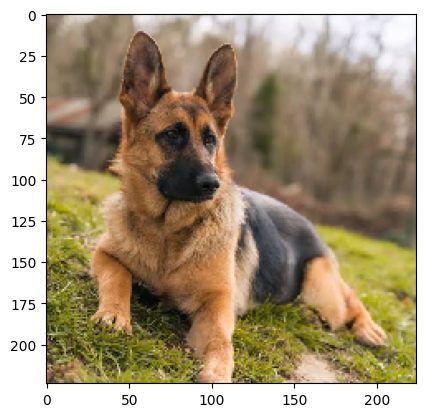

In [ ]:
#classify_image('https://dojo.soy/predict-dog')
classify_image('https://drive.google.com/uc?export=download&id=1sLeECF52E0QYLPARTu5Da1G8aoDLkw_I')